# Customer Satisfaction and Sentiment Analysis


## Import Libraries


In [6]:
import numpy as np
import pandas as pd
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

## Upload Dataset

In [7]:
# Read Data
df = pd.read_csv('/Users/mkhairunnisa/Documents/GitHub Portfolio/Data Analysis Dashboard/Ticket System Review/ticket_system_review.csv')

The following is the dictionary for the data, survey is only valid if all of the survey questions and text review is not blank (null):

**General Information**
- id_survey: identifier for each survey
- date_of_survey: date of survey taken
- ticket_system: The name of the ticket system being reviewed (e.g. Zoho Desk)

**Survey Questions**
- overall_rating: The overall satisfaction rating given by the reviewer, ranging from 1 to 5
- customer_service: The satisfaction rating for the customer service provided by the ticket system, ranging from 1 to 5.
- features: The satisfaction rating for the features of the ticket system, ranging from 1 to 5
- value_for_money: The satisfaction rating for the value for money provided by the ticket system, ranging from 1 to 5
- ease_of_use: The rating for how easy the ticket system is to use, ranging from 1 to 5
- likelihood_to_recommend: The likelihood that the reviewer would recommend the ticket system to others, ranging from 1 to 10
- overall_text: The full text of the overall review, providing detailed feedback on the ticket system.


In [8]:
df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...


In [9]:
# Check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                1462 non-null   object 
 1   date_of_survey           1462 non-null   object 
 2   ticket_system            1462 non-null   object 
 3   overall_rating           787 non-null    float64
 4   customer_service         787 non-null    float64
 5   features                 787 non-null    float64
 6   value_for_money          787 non-null    float64
 7   ease_of_use              787 non-null    float64
 8   likelihood_to_recommend  787 non-null    float64
 9   overall_text             787 non-null    object 
dtypes: float64(6), object(4)
memory usage: 114.3+ KB


## Data Cleaning

In [10]:
# Convert data type
df['date_of_survey'] = pd.to_datetime(df['date_of_survey'])

In [11]:
# check values
cols = ['overall_rating','customer_service','features', 'value_for_money', 'ease_of_use', 'likelihood_to_recommend']

for col in cols:
  print (df[col].value_counts())

overall_rating
5.00    492
4.00    251
3.00     38
2.00      4
1.00      2
Name: count, dtype: int64
customer_service
4.00     269
3.00     256
5.00     116
2.00      99
1.00      30
0.00      15
-1.00      2
Name: count, dtype: int64
features
5.00    419
4.00    293
3.00     61
2.00     12
1.00      2
Name: count, dtype: int64
value_for_money
5.00    435
4.00    247
3.00     80
2.00     19
1.00      6
Name: count, dtype: int64
ease_of_use
5.00    466
4.00    246
3.00     60
2.00     12
1.00      3
Name: count, dtype: int64
likelihood_to_recommend
8.00     224
9.00     174
7.00     155
6.00      82
10.00     77
5.00      34
4.00      18
3.00      10
2.00       5
1.00       5
0.00       2
-1.00      1
Name: count, dtype: int64


Since the data dictionary specifies that the range of values for customer service is 1 to 5, and likelihood_to_recommend is 1 to 10, the invalid data of 0 and -1 should be removed.

In [12]:
df = df[(df['customer_service'] > 0) & (df['likelihood_to_recommend'] > 0)]

In [13]:
# re-check values
cols = ['overall_rating','customer_service','features', 'value_for_money', 'ease_of_use', 'likelihood_to_recommend']

for col in cols:
  print (df[col].value_counts())

overall_rating
5.00    490
4.00    245
3.00     34
Name: count, dtype: int64
customer_service
4.00    269
3.00    256
5.00    116
2.00     98
1.00     30
Name: count, dtype: int64
features
5.00    417
4.00    288
3.00     57
2.00      7
Name: count, dtype: int64
value_for_money
5.00    433
4.00    245
3.00     75
2.00     14
1.00      2
Name: count, dtype: int64
ease_of_use
5.00    463
4.00    240
3.00     56
2.00     10
Name: count, dtype: int64
likelihood_to_recommend
8.00     222
9.00     174
7.00     153
6.00      81
10.00     77
5.00      32
4.00      16
3.00      10
2.00       4
Name: count, dtype: int64


## Survey Analysis

### Response Rate

In [14]:
# How many customer responded to the survey?
number_of_respondents = df['overall_rating'].notnull().sum()
print(f"The total number of valid responses is: {number_of_respondents}")

The total number of valid responses is: 769


In [15]:
# Responded Customer
df_filled = df[df['overall_rating'].notnull()].reset_index(drop = True)
df_filled.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
1,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
2,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...
3,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...
4,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...


### CSAT Score

The customer's overall satisfaction score (CSAT) can be measured with the following formula:

$$
CSAT = \frac{\Sigma\ total\ satisfaction\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

The max rating is inserted to convert the CSAT score into percentage.

CSAT score can be classified into categories based on the result. There is no absolute threshold for each categories but the following is the common threshold:

- \>= 90%: Excellent
- 75%-90%: Good
- 60-75%: Fair
- \<60%: Poor

In [16]:
# CSAT Score
# Filter filled survey
overall_scores = df_filled['overall_rating']

# Mean of overall rating
average_score = overall_scores.mean()

# Maximum score
max_rating = 5

# CSAT formula
csat_score = (average_score / max_rating) * 100

print(f"Overall Customer Satisfaction (CAST) Score: {csat_score:.2f}%")

# Interpretation (optional)
if csat_score >= 90:
  print("Interpretation: Excellent")
elif csat_score >= 75:
  print("Interpretation: Good")
elif csat_score >= 60:
  print("Interpretation: Fair")
else:
  print("Interpretation: Poor")

Overall Customer Satisfaction (CAST) Score: 91.86%
Interpretation: Excellent


The satisfaction score for the following attributes can also be measured:

- customer service
- features
- value for money

In [17]:
# Satisfaction Score for Attributes
# Attribute Scroes to be
attribute_columns = ['customer_service', 'features', 'value_for_money']

print("Satisfaction Score for Attributes:")

max_rating_attribute = 5

for attribute in attribute_columns:
    # Filter filled survey
    attribute_scores = df_filled[attribute]
    # Mean of rating
    average_attribute_score = attribute_scores.mean()
    # Calculate CSAT for each attribute
    attribute_satisfaction_score = (average_attribute_score / max_rating_attribute) * 100

    print(f"{attribute.replace('_', ' ').title()}: {attribute_satisfaction_score:.2f}%")

Satisfaction Score for Attributes:
Customer Service: 68.92%
Features: 89.00%
Value For Money: 88.43%


### CES Score

The ease of use for customers (CES) can be measured with the following formula:


$$
CES = \frac{\Sigma\ total\ effort\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

In [18]:
# CES Score
effort_scores = df_filled['ease_of_use']

# Mean of ease of use
average_effort_score = effort_scores.mean()

# Maximum score
max_rating_effort = 5

# CES Formula
ces_score = (average_effort_score / max_rating_effort) * 100

print(f"Customer Effort Score (CES): {ces_score:.2f}%")

Customer Effort Score (CES): 90.07%


### NPS Score

The Net Promoter Score (NPS) score can be calculated, fby first converting the **likelihood_to_recommend** column into proper NPS Category based on the rating value:

* Promoter: Rating 9-10
* Passive: Rating 7-8
* Detractor: Rating < 7

In [19]:
# Category NPS - option 1
nps_value = ['Promoter', 'Passive', 'Detractor']
nps_condition = [df_filled['likelihood_to_recommend'] >= 9,
                 df_filled['likelihood_to_recommend'] >= 7,
                 df_filled['likelihood_to_recommend'] < 7
                 ]

df_filled['nps_category'] = np.select(nps_condition, nps_value, default = 'Unknown')

In [20]:
# # Category NPS - option 2
# def get_nps_category(score):
#     if score >= 9:
#         return 'Promoter'
#     elif score >= 7:
#         return 'Passive'
#     else:
#         return 'Detractor'

# # Create categorical column
# df_filled['nps_category'] = df_filled['likelihood_to_recommend'].apply(get_nps_category)

# # Calculate number of respondents in each category
# print(df_filled['nps_category'].value_counts())


The NPS Score can be calculated with the following formula:

$$
NPS = \frac{Promoter - Detractor}{Total\ Survey\ Responded}
$$

In [21]:
# NPS Score
# Calculate each category
nps_counts = df_filled['nps_category'].value_counts()

# Get values
promoter_count = nps_counts.get('Promoter', 0)
detractor_count = nps_counts.get('Detractor', 0)

# Calculate percentage of promoters and detractors
percent_promoters = (promoter_count / number_of_respondents) * 100
percent_detractors = (detractor_count / number_of_respondents) * 100

# NPS Formula
nps_score = percent_promoters - percent_detractors

print(f"Net Promoter Score (NPS): {nps_score:.2f}%")

Net Promoter Score (NPS): 14.04%


NPS score can be range from -100 (when all customers are detractor) to 100 (when all customers are promoter).

NPS Score can be classified into categories based on the following threshold:

- \>= 70: Excellent
- 50-69: Very Good
- 30-49: Good
- 0-29: Average
- \< 0: Poor

In [22]:
# Interpretation
if nps_score >= 70:
    print("Interpretation: Excellent")
elif nps_score >= 50:
    print("Interpretation: Very Good")
elif nps_score >= 30:
    print("Interpretation: Good")
elif nps_score >= 0:
    print("Interpretation: Average")
else:
    print("Interpretation: Poor")

Interpretation: Average


## Sentiment Analysis

In [23]:
# Create new dataframe to filter empty overall_text
df_sentiment = df_filled.copy()
df_sentiment.head(3)

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,nps_category
0,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Detractor
1,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Passive
2,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Detractor


### Text Cleansing

In order to get more accurate sentiment, several text cleansing need to be done. However, in most of recent sentiment analysis models and algorithm, the only text cleansing needed are as follows:

* Clean double whitespace
* Clean URL/website
* Clean username (mostly in social media or digital text)

In [24]:
# Double check missing
df_sentiment['overall_text'].isnull().sum()

0

In [25]:
import re

def cleansing_text(x):
  # clean double whitespace
  out_text = ' '.join(x.split())

  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)

  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)

  return(out_text)

cleansing_text(" Doesn't  dissapoint. The car       was great. It was the best car rental experiences I've had! Salute to @jone who recommend https:/rental.com")

"Doesn't dissapoint. The car was great. It was the best car rental experiences I've had! Salute to @user who recommend http"

In [26]:
# apply cleansing to review
df_sentiment['cleaned_text'] = df_sentiment['overall_text'].apply(cleansing_text)

### Sentiment Analysis

In [27]:
# Sentiment Algorithm - option 1
!pip install transformers==4.40.2 --upgrade
from transformers import pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 7.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.1
    Uninstalling transformers-4.53.1:
      Successfully uninstalled transformers-4.53.1


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [28]:
# Sentiment analysis task with twitter roberta model
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Predict sentiment
transformer_results = sentiment_pipeline(df_sentiment['cleaned_text'].tolist())

df_sentiment['sentiment_score'] = transformer_results
df_sentiment['sentiment'] = df_sentiment['sentiment_score'].apply(lambda x: x['label'])

# Create sentiment category
sent_value = ['Negative', 'Neutral', 'Positive']
sent_condition = [df_sentiment['sentiment'] == 'LABEL_0',
                  df_sentiment['sentiment'] == 'LABEL_1',
                  df_sentiment['sentiment'] == 'LABEL_2'
                  ]

df_sentiment['sentiment'] = np.select(sent_condition, sent_value, default='Unknown')

df_sentiment.head()

/opt/anaconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,nps_category,cleaned_text,sentiment_score,sentiment
0,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Detractor,Customer tickets managements,"{'label': 'LABEL_1', 'score': 0.7328799366950989}",Neutral
1,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Passive,"After 6 months of using the Zoho desk, we shif...","{'label': 'LABEL_2', 'score': 0.9796792268753052}",Positive
2,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Detractor,Pros:Zendesk has always been one of the go-to ...,"{'label': 'LABEL_2', 'score': 0.787929356098175}",Positive
3,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...,Passive,It has been very useful so far to integrate mu...,"{'label': 'LABEL_2', 'score': 0.9632710218429565}",Positive
4,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...,Passive,Pros:It's easy to use and very intuitive.We ha...,"{'label': 'LABEL_2', 'score': 0.8690704703330994}",Positive


In [29]:
# # Sentiment Algorithm - option 2
# !pip install vaderSentiment
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# # Create analyzer object
# analyzer = SentimentIntensityAnalyzer()

# # Create function to get the sentiment label from the text
# def get_sentiment(text):
#     # Analyze sentiment scores
#     scores = analyzer.polarity_scores(text)
#     # Create a score compound
#     compound_score = scores['compound']

#     # Categorize sentiment based on score compound
#     if compound_score >= 0.05:
#       return 'Positive'
#     elif compound_score <= -0.05:
#       return 'Negative'
#     else:
#       return 'Neutral'

# df_sentiment['sentiment'] = df_sentiment['cleaned_text'].apply(get_sentiment)

# df_sentiment[['cleaned_text', 'sentiment']].head()

Check the number of data by sentiment.

In [30]:
# Number of Sentiment - option 1
sentiment_counts = df_sentiment['sentiment'].value_counts()
sentiment_counts

sentiment
Positive    656
Neutral      97
Negative     16
Name: count, dtype: int64

In [31]:
# # Number of Sentiment - option 2
# sentiment_counts = df_sentiment['sentiment'].value_counts()
# sentiment_counts

In [32]:
df_sentiment['sentiment'].value_counts(normalize=True) * 100 # in percentage (optional)

sentiment
Positive   85.31
Neutral    12.61
Negative    2.08
Name: proportion, dtype: float64

## Finalize Data for Reporting

In [33]:
# Save Data
# Create DataFrame
final_info = [
    'id_survey',
    'date_of_survey',
    'ticket_system',
    'overall_rating',
    'customer_service',
    'features',
    'value_for_money',
    'ease_of_use',
    'likelihood_to_recommend',
    'nps_category',
    'sentiment',
    'cleaned_text'
]

df_final = df_sentiment[final_info]

df_final.to_csv('cleaned_ticket_system_review.csv', index=False)

## Word Cloud

In [34]:
%%capture
import nltk

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

!pip install contractions

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import contractions

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Create more detailed text cleansing
def clean_tokenize_text(x):
  # lower text
  out_text = x.lower()
  # clean double whitespace
  out_text = ' '.join(out_text.split())
  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)
  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)
  # remove punctuation
  out_text = out_text.translate(str.maketrans('', '', string.punctuation))
  # fix word contraction: don't -> do not
  out_text = contractions.fix(out_text)
  # tokenize the text
  tokens = word_tokenize(out_text)
  # exclude stop words
  tokens = [word for word in tokens if word not in stop_words]
  # lematize tokens: cats -> cat
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return(tokens)

In [35]:
df_review_token = df_final[['id_survey', 'cleaned_text', 'sentiment']].copy()
df_review_token.head()

,id_survey,cleaned_text,sentiment
0,T_00229,Customer tickets managements,Neutral
1,T_04527,"After 6 months of using the Zoho desk, we shif...",Positive
2,T_00644,Pros:Zendesk has always been one of the go-to ...,Positive
3,T_04682,It has been very useful so far to integrate mu...,Positive
4,T_01238,Pros:It's easy to use and very intuitive.We ha...,Positive


In [36]:
clean_tokenize_text('This   product sparks joy. You should try it!')

['product', 'spark', 'joy', 'try']

In [37]:
df_review_token['token'] = df_review_token['cleaned_text'].apply(clean_tokenize_text)
df_review_token = df_review_token.explode('token')
df_review_token = df_review_token[['id_survey', 'sentiment', 'cleaned_text', 'token']]

df_review_token.head()

,id_survey,sentiment,cleaned_text,token
0,T_00229,Neutral,Customer tickets managements,customer
0,T_00229,Neutral,Customer tickets managements,ticket
0,T_00229,Neutral,Customer tickets managements,management
1,T_04527,Positive,"After 6 months of using the Zoho desk, we shif...",6
1,T_04527,Positive,"After 6 months of using the Zoho desk, we shif...",month


In [38]:
# Only check for positive and negative sentiment
df_top_word = df_review_token[ df_review_token['sentiment'] != 'Neutral' ]
df_top_word = df_top_word.groupby(['sentiment', 'token']).agg({'id_survey':'nunique'}).reset_index()

# Get top 50 words
df_top_word = df_top_word.sort_values(['sentiment', 'id_survey'], ascending = [False, False])
df_top_word = df_top_word.groupby('sentiment').head(50)

df_top_word.head()

,sentiment,token,id_survey
652,Positive,customer,179
2349,Positive,use,154
2161,Positive,support,153
788,Positive,easy,140
2256,Positive,tool,104


In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

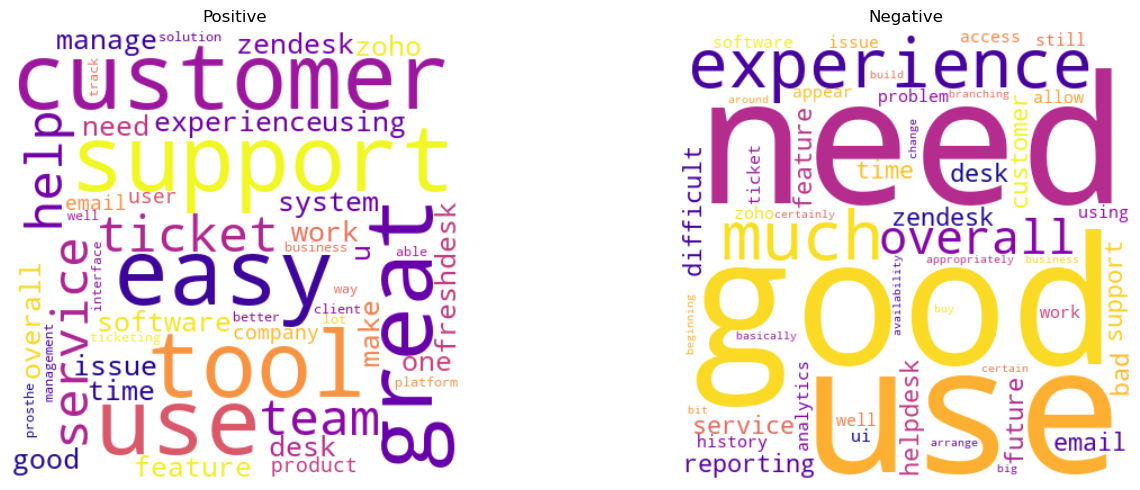

In [42]:
groups = df_top_word['sentiment'].unique()

# Set up the plot
fig, axes = plt.subplots(1, len(groups), figsize=(15, 5), squeeze=False)

# Generate word clouds for each group
for idx, group in enumerate(groups):
    text = " ".join(df_top_word[ df_top_word['sentiment'] == group]['token'])
    wordcloud = WordCloud(width=400, height=400,
                          background_color='white',
                          colormap = 'plasma'
                          ).generate(text)

    # Display the word cloud
    axes[0, idx].imshow(wordcloud, interpolation='bilinear')
    axes[0, idx].set_title(f"{group}")
    axes[0, idx].axis('off')

plt.tight_layout()
plt.show()